### Importing the libraries and Dataset

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc,log_loss
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [37]:
df = datasets.load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 1) Training the model

In [38]:
x=df.data
y=df.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
sk_model = LogisticRegression()

sk_model.fit(x_train,y_train)

y_pred=sk_model.predict(x_test)

### 2) Classification mertics

#### Confusion Matrix :

In [40]:
cm=confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,16,0,0
VERSICOLR,0,17,1
VIRGINICA,0,0,11


#### ROC Curve : (one vs rest)

In [41]:
# Binarize the output
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

In [42]:
# re-divide the data
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3,random_state=0)

In [43]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,))
Y_pred = classifier.fit(X_train, Y_train).decision_function(X_test)


In [45]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [46]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

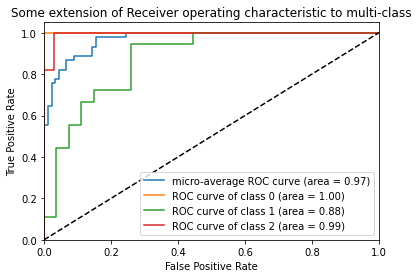

In [47]:
# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#### Log Loss :

In [53]:
log_loss(Y_test,Y_pred)

1.108336516383401

### 3) Commenting the results :

##### Confusion Matrix :
looking at the Matrix itself we can see that only one prediction was out of place which is really good.
#### ROC :
for our ROC we can see that our curves all are near to 1 which means that our predictions where good
#### log loss :
the raw log loss value on it own doesn't mean much, it is better when we compare 2 values to see which one is lower, but nontheless , our value here isn't the lowest , but it isn't that high either so it's quite alright
#### Conclusion :
Based on the evaluation metrics we have tested, and the results we got, we can say that our model is satisfying 